# Kaczmarz Method

Iterative Row-Action Method

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from functions import modulo
import glob
import sympy as sp

Considering a matricial problem $$Ax = b$$

In [2]:
#Definitons
A = [[1,2],
    [1,-1]]

b = [[3],[1]]

x0 = [[3, 4]] # initial point


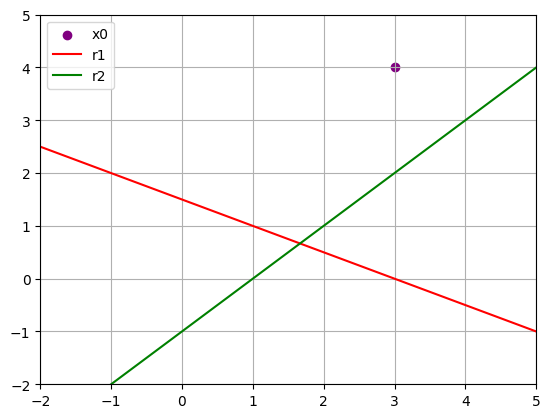

In [3]:
#Plotting the initial condition
plt.scatter(x0[0][0], x0[0][1], color='purple',label='x0')
x=np.linspace(-2,5)
r1 = (3 - x)/2 #line r1 defined by the coefficients in A and the constant in b
plt.plot(x,r1, color='r', label='r1')
r2 = (1-x)/-1 #line r2 defined by the coefficients in A and the constant in b
plt.plot(x,r2,color='g', label='r2')
plt.xlim(-2, 5) 
plt.ylim(-2, 5) 
plt.grid('on') 
plt.legend()
plt.show() 

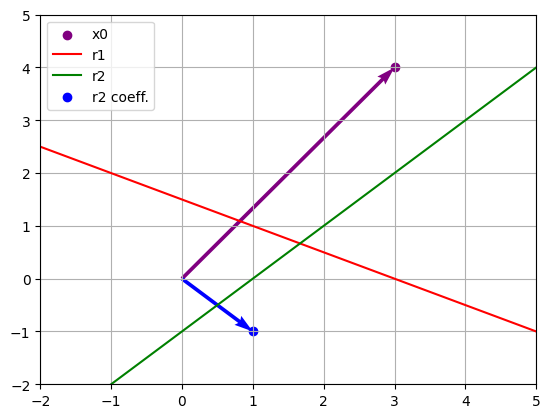

In [4]:
X = [0,0] 
Y = [0,0] 
U = [3,1]   
V = [4,-1]   

plt.scatter(x0[0][0], x0[0][1], color='purple',label='x0')
#x=np.linspace(-2,5)
#r1 = (3 - x)/2
plt.plot(x,r1, color='r', label='r1')
#r2 = (1-x)/-1
plt.plot(x,r2,color='g', label='r2')

plt.quiver(X, Y, U, V, 
           color=['purple', 'b'], 
           angles='xy', scale_units='xy', scale=1)

plt.scatter(A[1][0], A[1][1], color='b',label='r2 coeff.') # a vector defined by the coefficients of r2
#plt.scatter(X, Y, s=100, color=['b', 'm']) 
#plt.title('Single Vector') 
plt.xlim(-2, 5) 
plt.ylim(-2, 5) 
plt.grid('on') 
plt.legend()
plt.show() 

Calculating the term similar to the Gram-Schmidt Process:
$$\frac{<a_{i},x_{0}>}{<a_{i},a_{i}>}a_{i} =$$

In [5]:
sgm = (np.inner(A[1],x0)/np.inner(A[1],A[1]))*A[1]
print(sgm)

[-0.5  0.5]


Calculating the 'new' term:
$$\frac{b_{i}}{<a_{i},a_{i}>}a_{i} =$$

In [6]:
new_point = (b[1]/(np.inner(A[1],A[1])))*A[1]
print(new_point)

[ 0.5 -0.5]


Or... calculating the complete term:
$$\frac{b_{i} - <a_{i},x_{0}>}{<a_{i},a_{i}>}a_{i} =$$

In [7]:
term = ((b[1]-np.inner(A[1],x0))/np.inner(A[1],A[1]))*A[1]
print(term)

[ 1. -1.]


Finding out the orthogonal projection, the vector $\hat{\vec{x_{0}}}$

In [8]:
#Finding x0 originated from (0,0)
x0_hat = x0 - sgm
print("x0_hat =", x0_hat)

x0_hat = [[3.5 3.5]]


In [9]:
#P = z + new_point - sgm
#print(P)

In [10]:
#Finding the projection into r2
P = x0 + term
print(P)

[[4. 3.]]


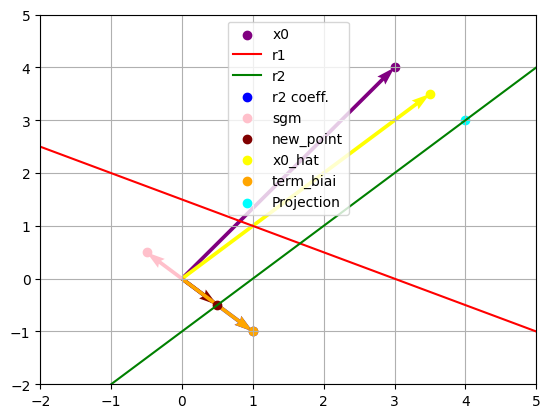

In [11]:
X = [0,0,0,0,0,0] 
Y = [0,0,0,0,0,0] 
U = [3,1,0.5,3.5,1,-0.5]   
V = [4,-1,-0.5,3.5,-1,0.5]   

plt.scatter(x0[0][0], x0[0][1], color='purple',label='x0')
x=np.linspace(-2,5)
r1 = (3 - x)/2
plt.plot(x,r1, color='r', label='r1')
r2 = (1-x)/-1
plt.plot(x,r2,color='g', label='r2')

plt.quiver(X, Y, U, V, 
           color=['purple', 'b','maroon','yellow','orange','pink'], 
           angles='xy', scale_units='xy', scale=1)

plt.scatter(A[1][0], A[1][1], color='b',label='r2 coeff.') # a vector defined by the coefficients of r2
plt.scatter(sgm[0], sgm[1], color='pink', label='sgm')
plt.scatter(new_point[0], new_point[1], color='maroon', label='new_point')
plt.scatter(x0_hat[0][0], x0_hat[0][1], color='yellow', label='x0_hat')
plt.scatter(term[0], term[1], color='orange', label='term_biai')
plt.scatter(P[0][0],P[0][1],color='cyan',label='Projection')
#plt.scatter(X, Y, s=100, color=['b', 'm']) 
#plt.title('Single Vector') 
plt.xlim(-2, 5) 
plt.ylim(-2, 5) 
plt.grid('on') 
plt.legend()
plt.show() 

Considering the projection the next x, we can repeat the process (iterate):

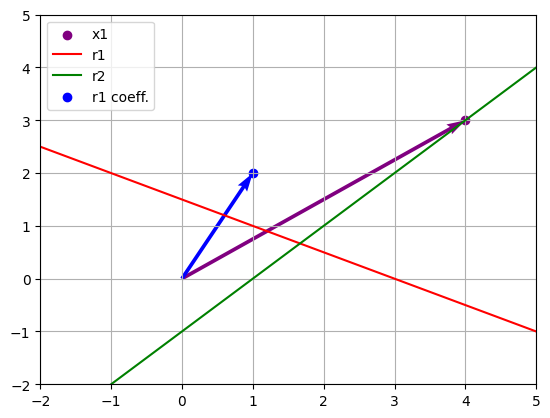

In [12]:
X = [0,0] 
Y = [0,0] 
U = [4,1]   
V = [3,2]   

x1 = [[4,3]]

plt.scatter(x1[0][0], x1[0][1], color='purple',label='x1')
#x=np.linspace(-2,5)
#r1 = (3 - x)/2
plt.plot(x,r1, color='r', label='r1')
#r2 = (1-x)/-1
plt.plot(x,r2,color='g', label='r2')

plt.quiver(X, Y, U, V, 
           color=['purple', 'b'], 
           angles='xy', scale_units='xy', scale=1)
plt.scatter(A[0][0], A[0][1], color='b',label='r1 coeff.') # a vector defined by the coefficients of r1
#plt.scatter(X, Y, s=100, color=['b', 'm']) 
#plt.title('Single Vector') 
plt.xlim(-2, 5) 
plt.ylim(-2, 5) 
plt.grid('on') 
plt.legend()
plt.show() 

Calculating the term similar to the Gram-Schmidt Process:
$$\frac{<a_{i},x_{1}>}{<a_{i},a_{i}>}a_{i} =$$

In [13]:
sgm = (np.inner(A[0],x1)/np.inner(A[0],A[0]))*A[0]
print(sgm)

[2. 4.]


Calculating the 'new' term:
$$\frac{b_{i}}{<a_{i},a_{i}>}a_{i} =$$

In [14]:
new_point = (b[0]/(np.inner(A[0],A[0])))*A[0]
print(new_point)

[0.6 1.2]


Or... calculating the complete term:
$$\frac{b_{i} - <a_{i},x_{0}>}{<a_{i},a_{i}>}a_{i} =$$

In [15]:
term = ((b[0]-np.inner(A[0],x1))/np.inner(A[0],A[0]))*A[0]
print(term)

[-1.4 -2.8]


Finding out the orthogonal projection, the vector $\hat{\vec{x_{1}}}$

In [16]:
#Finding x1 originated from (0,0)
x1_hat = x1 - sgm
print("x1_hat =",x1_hat)

x1_hat = [[ 2. -1.]]


In [17]:
#Finding the projection into r1
P = x1 + term
print(P)

[[2.6 0.2]]


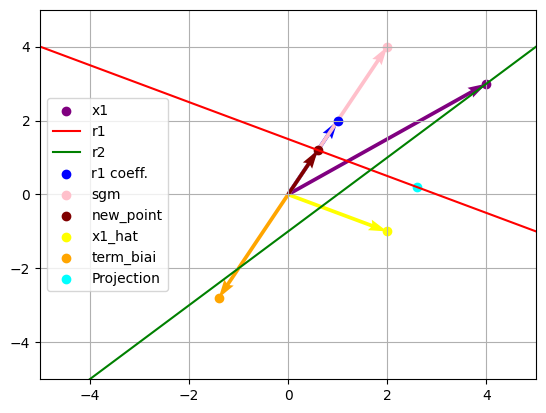

In [18]:
X = [0,0,0,0,0,0] 
Y = [0,0,0,0,0,0] 
U = [4,1,2,2,0.6,-1.4]   
V = [3,2,4,-1,1.2,-2.8]   

plt.scatter(4, 3, color='purple',label='x1')
x=np.linspace(-5,5)
r1 = (3 - x)/2
plt.plot(x,r1, color='r', label='r1')
r2 = (1-x)/-1
plt.plot(x,r2,color='g', label='r2')

plt.quiver(X, Y, U, V, 
           color=['purple', 'b','pink','yellow','maroon','orange'], 
           angles='xy', scale_units='xy', scale=1)

plt.scatter(A[0][0], A[0][1], color='b',label='r1 coeff.') # a vector defined by the coefficients of r1
plt.scatter(sgm[0], sgm[1], color='pink', label='sgm')
plt.scatter(new_point[0], new_point[1], color='maroon', label='new_point')
plt.scatter(x1_hat[0][0], x1_hat[0][1], color='yellow', label='x1_hat')
plt.scatter(term[0], term[1], color='orange', label='term_biai')
plt.scatter(P[0][0],P[0][1],color='cyan',label='Projection')

#plt.scatter(X, Y, s=100, color=['b', 'm']) 
#plt.title('Single Vector') 
plt.xlim(-5, 5) 
plt.ylim(-5, 5) 
plt.grid('on') 
plt.legend()
plt.show() 

Analizing the process of the method, it is possible to observe that the method:

- Take the initial point (e.g. $x_{0}$, $x_1$, $x{n}$)
- Subtract a term similar to the Gram-Schmidt Process, finding out the projection parallel to the respective line
- Add one that corresponds to the base vector that gives all the points in the respective line
- Find out $x_{n+1}$
- Iterate until reach the convergence point or a stop criteria

In [19]:
#Definitons
A = np.array([[1,2],
            [3,-1]])

b = np.array([[3,1]])

x0 = np.array([[49/7, 10/7]]) # initial point

m,n = A.shape


In [34]:
def error(A,b,x):
    """A function to calculate the error associated with the linear system solving."""
    xt = np.transpose(x)
    e = np.max(np.abs(np.dot(A,xt) - b))
    #print("Matrix of errors: ", np.abs(np.dot(A,x) - b))
    return e

def kaczmerz_method(A, b, x, TOL):

    """
    Kaczmerz Method implemented.
    
    Input:
        A: Operator. 
           Format: 
           (2D Array example)
            A = np.array([[1,2],
            [3,-1]])

        b: Resultant vector.
           Format:
            (2D Array example)
            b = np.array([3,1])
        
        x0: Initial point. 
             Format: 
              (2D Array example)
              x =np.array([49/7, 10/7])

        TOL: Tolerance value for the error.
    
    Results:
        x: Solution vector

        np.array(Xhistory): The x value history

        np.array(Xhistory): The error value history
            
    """
    m,n = A.shape

    Xhistory = [x] #A list to store the values of x of all iterations
    Ehistory = [error(A, b, x)] #A list th store the error values

    k=0 
    p = range(m)

    while True: #An infinit loop: it continues to execute indefinitely until it is forced to stop (usually by a 'break')
        print("Iteration number:", k)
        i = modulo(k,m) #Index of the 'projection line' -> 'circular'
        
        ai = A[i,:] #th-Row respective to the 'projection line'
        bi = b[i]
        xi = x
        print("xi = ", xi)
        x_new = xi + (np.dot(((bi-np.inner(ai,xi))/np.inner(ai,ai)),ai)) #New x value: projection
        e = error(A, b, x_new) #Error of current linear system 
        
        Xhistory.append(x_new) #Add the new x value in the list
        Ehistory.append(e) #Add the new error value in the list

        if e < TOL: #If the e is less than the tolerance indicated
            break #It exit the inner loop ('while')
        
        #If not
        x = x_new #Update the value of x
        k += 1 #To update the iteration

    #Returns the resultant projection, the x value history, and the error value history
    return x, np.array(Xhistory), np.array(Ehistory)

def plot_trajectory(A, b, Xhistory):
    # Draw the problem array hyperplanes, which for n = 2 are lines.
    x = np.linspace(-5, 5, 2) #Defines the endpoints of the lines, in this case array [-5, 5]
    M = np.vstack((x, np.ones(2))).T #Matrix to help calculating y-coordinates of the lines, establishing the constrains: [[-5, 5],[1,1] -> [[-5, 1], [5,1]]
    m,n = A.shape
    for i in range(m): #Iterate A rows
        y = np.dot(M,(-A[i,0], b[i])) / A[i,1] #y = (-A[i,0]*m1 + b[i])/A[i,1]
        plt.plot(x, y) #Draws a line connecting these two points (by default)

    # Plot the trajectory of the Kaczmarz solution algorithm.
    plt.plot(Xhistory[:,0], Xhistory[:,1], 'k-o') #'k-o' meand black, solid line, circle
    # Set the Axes aspect ratio so that right angles look correct.
    plt.axis('square')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [1.4 0.8]
Iteration number: 2
xi =  [0.68 1.04]
Iteration number: 3
xi =  [0.728 1.136]


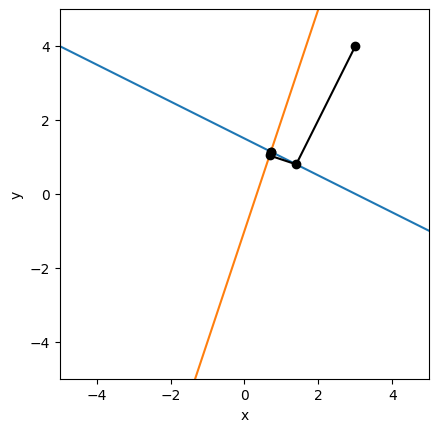

Solution vector: [0.728 1.136].


In [35]:
#Definitons
A = np.array([[1,2],
            [3,-1]])

b = np.array([3,1])

x0 = np.array([3, 4]) # initial point

#Solving
x, Xhistory, _ = kaczmerz_method(A, b, x0, 1.e-2)
plot_trajectory(A, b, Xhistory)
print(f'Solution vector: {x}.')

In [36]:
def gauss_elimination(A, b):

    print("Original matrix:", A)
    print("Resulting vector:", b)
    m,n = A.shape

    x = np.zeros(n)

    for k in range(0, n-1):
        for i in range(k+1, n):
            mul = A[i,k]/A[k,k]
            b[0,i] = b[0,i]-mul*b[0,k]
            A[i,k] = 0

            for j in range(k+1,n):
                A[i,j] = A[i,j] - mul*A[k,j]

    x[n-1] = b[0,n-1]/A[n-1,n-1]

    for k in range(n-1, -1, -1):
        s=0
        for j in range(k+1, n):
            s = s + A[k,j] * x[j]
            x[k] = (b[0,k] - s)/A[k,k]

    print("Scaling Matrix:", A)
    print("Solution:", x)

    return x, A


In [37]:
#Definitons
A = np.array([[1,2],
            [3,-1]])

b = np.array([[3,1]])

xa, As = gauss_elimination(A, b)

Original matrix: [[ 1  2]
 [ 3 -1]]
Resulting vector: [[3 1]]
Scaling Matrix: [[ 1  2]
 [ 0 -7]]
Solution: [0.71428571 1.14285714]


In [38]:
def error_metric(Xa, Xn):

    d = 0
    for i in range(len(Xa)):
        d += (Xa[i]-Xn[i])**(2)
    
    d = np.sqrt(d)

    return d


In [39]:
#Comparing
error_metric(xa, x)

0.015333037559998642

In [40]:
def sys_split(A, shape):

    A_es = np.zeros((shape[0],shape[1]))
    A_ei = np.zeros((shape[0],shape[1]))

    Ac = A.copy()

    for r in range(shape[0]):
        for c in range(shape[1]):
            element = Ac[r,c]
            if isinstance(element,(int,float)):
                A_ei[r,c] = element
                A_es[r,c] = element

            elif isinstance(element,np.ndarray):
                A_ei[r,c] = element[0]
                A_es[r,c] = element[1]

    if shape[0] == 1:
        return A_ei[0], A_es[0]
    
    else:
        return A_ei, A_es

In [41]:
Ai = np.array([[np.array([0,2]), 2],[3, np.array([-2,0])]], dtype=object)

A_ei, A_es = sys_split(Ai,(2,2))
print("Matrix - lower endpoint:")
print(A_ei)
print()
print("Matrix - upper endpoint:")
print(A_es)

Matrix - lower endpoint:
[[ 0.  2.]
 [ 3. -2.]]

Matrix - upper endpoint:
[[2. 2.]
 [3. 0.]]


In [42]:
## PIPELINE 1
print("α = 0 :")
pA = np.array([[np.array([0,2]), np.array([1,3])],[np.array([2,4]), np.array([-2,0])]], dtype=object)
pb = np.array([[np.array([2,4]), np.array([0,2])]], dtype=object)
px0 = np.array([3,4], dtype=object)

pA_ei, pA_es = sys_split(pA,(2,2))
print("Matrix A - lower endpoint:")
print(pA_ei)
print("Matrix A - upper endpoint:")
print(pA_es)

print()

pb_ei, pb_es = sys_split(pb,(1,2))
print("Matrix b- lower endpoint:")
print(pb_ei)
print("Matrix b - upper endpoint:")
print(pb_es)

print()

print("First guess:")
print(px0)

#px_ei, pXhistory_ei, _ = kaczmerz_method(pA_ei, pb_ei, px0, 1.e-2)
#plot_trajectory(pA_ei, pb_ei, pXhistory_ei)
#print(f'Solution vector: {px_ei}.')

#px_es, pXhistory_es, _ = kaczmerz_method(pA_es, pb_es, px0, 1.e-2)
#plot_trajectory(pA_es, pb_es, pXhistory_es)
#print(f'Solution vector: {px_es}.')

α = 0 :
Matrix A - lower endpoint:
[[ 0.  1.]
 [ 2. -2.]]
Matrix A - upper endpoint:
[[2. 3.]
 [4. 0.]]

Matrix b- lower endpoint:
[2. 0.]
Matrix b - upper endpoint:
[4. 2.]

First guess:
[3 4]


Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [3.0 2.0]
Iteration number: 2
xi =  [2.5 2.5]
Iteration number: 3
xi =  [2.5 2.0]
Iteration number: 4
xi =  [2.25 2.25]
Iteration number: 5
xi =  [2.25 2.0]
Iteration number: 6
xi =  [2.125 2.125]
Iteration number: 7
xi =  [2.125 2.0]
Iteration number: 8
xi =  [2.0625 2.0625]
Iteration number: 9
xi =  [2.0625 2.0]
Iteration number: 10
xi =  [2.03125 2.03125]
Iteration number: 11
xi =  [2.03125 2.0]
Iteration number: 12
xi =  [2.015625 2.015625]
Iteration number: 13
xi =  [2.015625 2.0]


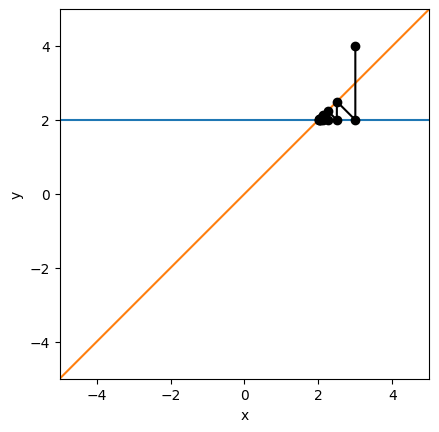

Solution vector: [2.015625 2.0].


In [43]:
px_ei, pXhistory_ei, _ = kaczmerz_method(pA_ei, pb_ei, px0, 1.e-2)
plot_trajectory(pA_ei, pb_ei, pXhistory_ei)
print(f'Solution vector: {px_ei}.')

Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [0.8461538461538463 0.7692307692307692]
Iteration number: 2
xi =  [0.5 0.7692307692307692]
Iteration number: 3
xi =  [0.606508875739645 0.9289940828402367]
Iteration number: 4
xi =  [0.5 0.9289940828402367]
Iteration number: 5
xi =  [0.5327719617660447 0.9781520254893036]
Iteration number: 6
xi =  [0.5 0.9781520254893036]
Iteration number: 7
xi =  [0.5100836805433984 0.9932775463044011]
Iteration number: 8
xi =  [0.5 0.9932775463044011]
Iteration number: 9
xi =  [0.5031026709364302 0.9979315527090465]


C:\Users\vitoria220056\AppData\Local\Temp\ipykernel_4936\3563424995.py:78: RuntimeWarning: divide by zero encountered in divide
  y = np.dot(M,(-A[i,0], b[i])) / A[i,1] #y = (-A[i,0]*m1 + b[i])/A[i,1]


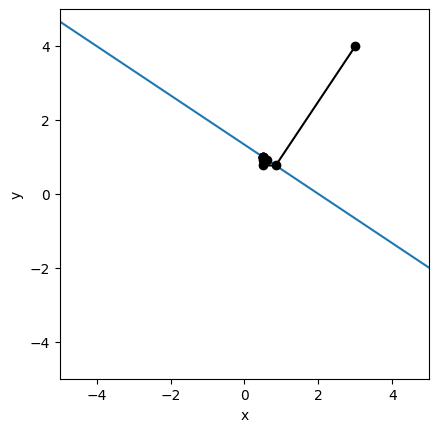

Solution vector: [0.5031026709364302 0.9979315527090465].


In [44]:
px_es, pXhistory_es, _ = kaczmerz_method(pA_es, pb_es, px0, 1.e-2)
plot_trajectory(pA_es, pb_es, pXhistory_es)
print(f'Solution vector: {px_es}.')

α = 0 :
Matrix A - lower endpoint:
[[ 0.  1.]
 [ 2. -2.]]
Matrix A - upper endpoint:
[[2. 3.]
 [4. 0.]]

Matrix b- lower endpoint:
[2. 0.]
Matrix b - upper endpoint:
[4. 2.]

First guess:
[3 4]

Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [3.0 2.0]
Iteration number: 2
xi =  [2.5 2.5]
Iteration number: 3
xi =  [2.5 2.0]
Iteration number: 4
xi =  [2.25 2.25]
Iteration number: 5
xi =  [2.25 2.0]
Iteration number: 6
xi =  [2.125 2.125]
Iteration number: 7
xi =  [2.125 2.0]
Iteration number: 8
xi =  [2.0625 2.0625]
Iteration number: 9
xi =  [2.0625 2.0]
Iteration number: 10
xi =  [2.03125 2.03125]
Iteration number: 11
xi =  [2.03125 2.0]
Iteration number: 12
xi =  [2.015625 2.015625]
Iteration number: 13
xi =  [2.015625 2.0]


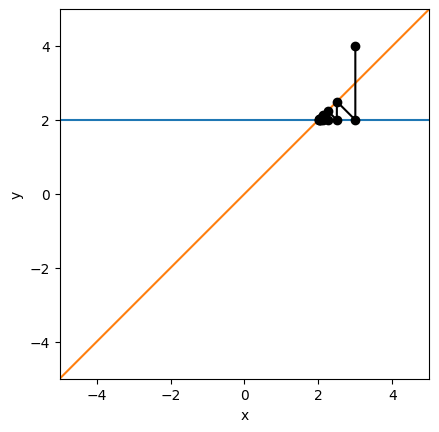

Solution vector: [2.015625 2.0].
Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [0.8461538461538463 0.7692307692307692]
Iteration number: 2
xi =  [0.5 0.7692307692307692]
Iteration number: 3
xi =  [0.606508875739645 0.9289940828402367]
Iteration number: 4
xi =  [0.5 0.9289940828402367]
Iteration number: 5
xi =  [0.5327719617660447 0.9781520254893036]
Iteration number: 6
xi =  [0.5 0.9781520254893036]
Iteration number: 7
xi =  [0.5100836805433984 0.9932775463044011]
Iteration number: 8
xi =  [0.5 0.9932775463044011]
Iteration number: 9
xi =  [0.5031026709364302 0.9979315527090465]


C:\Users\vitoria220056\AppData\Local\Temp\ipykernel_4936\3563424995.py:78: RuntimeWarning: divide by zero encountered in divide
  y = np.dot(M,(-A[i,0], b[i])) / A[i,1] #y = (-A[i,0]*m1 + b[i])/A[i,1]


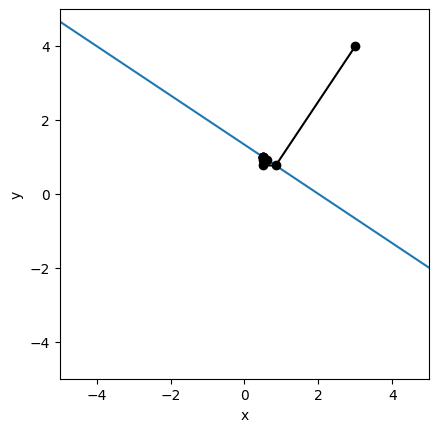

Solution vector: [0.5031026709364302 0.9979315527090465].

α = 0.5 :
Matrix A - lower endpoint:
[[ 0.5  1.5]
 [ 2.5 -1.5]]
Matrix A - upper endpoint:
[[ 1.5  2.5]
 [ 3.5 -0.5]]

Matrix b- lower endpoint:
[2.5 0.5]
Matrix b - upper endpoint:
[3.5 1.5]

First guess:
[3 4]

Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [2.0 1.0]
Iteration number: 2
xi =  [1.1176470588235294 1.5294117647058822]
Iteration number: 3
xi =  [1.0470588235294118 1.3176470588235296]
Iteration number: 4
xi =  [1.0055363321799309 1.3425605536332181]


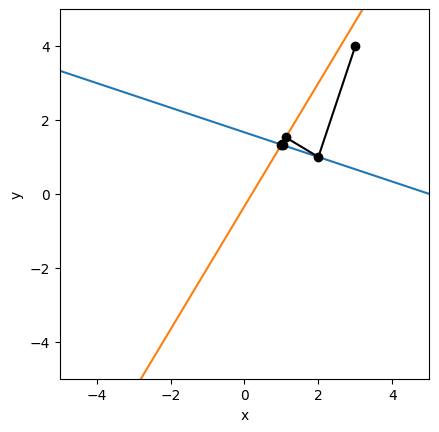

Solution vector: [1.0055363321799309 1.3425605536332181].
Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [1.0588235294117645 0.7647058823529411]
Iteration number: 2
xi =  [0.548235294117647 0.8376470588235293]
Iteration number: 3
xi =  [0.65121107266436 1.009273356401384]
Iteration number: 4
xi =  [0.574322491349481 1.0202574394463668]
Iteration number: 5
xi =  [0.5898294321188684 1.0461023407286791]
Iteration number: 6
xi =  [0.5782509163443925 1.0477564144107472]


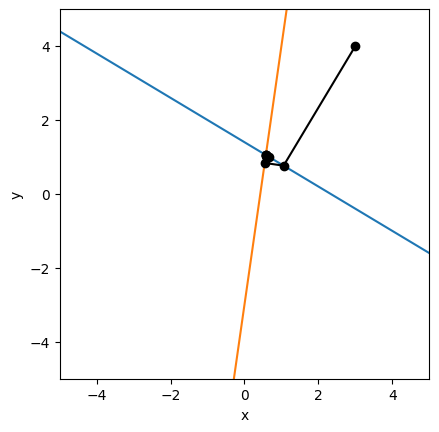

Solution vector: [0.5782509163443925 1.0477564144107472].

α = 1 :
Matrix A - lower endpoint:
[[ 1.  2.]
 [ 3. -1.]]
Matrix A - upper endpoint:
[[ 1.  2.]
 [ 3. -1.]]

Matrix b- lower endpoint:
[3. 1.]
Matrix b - upper endpoint:
[3. 1.]

First guess:
[3 4]

Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [1.4 0.7999999999999998]
Iteration number: 2
xi =  [0.6800000000000002 1.0399999999999998]
Iteration number: 3
xi =  [0.7280000000000002 1.136]


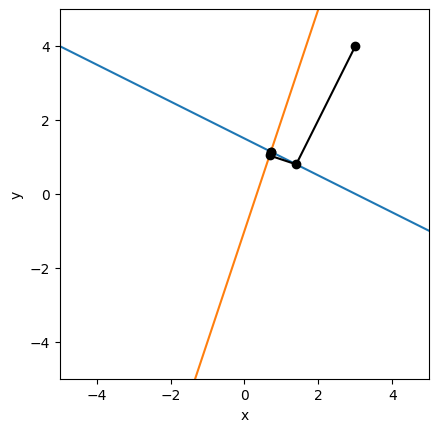

Solution vector: [0.7280000000000002 1.136].
Iteration number: 0
xi =  [3 4]
Iteration number: 1
xi =  [1.4 0.7999999999999998]
Iteration number: 2
xi =  [0.6800000000000002 1.0399999999999998]
Iteration number: 3
xi =  [0.7280000000000002 1.136]


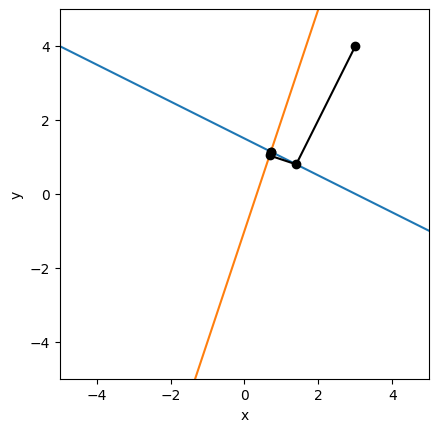

Solution vector: [0.7280000000000002 1.136].



In [45]:
## PIPELINE 1
for alpha in [0, 0.5, 1]:
    print(f"α = {alpha} :")
    pA = np.array([[np.array([0+alpha,2-alpha]), np.array([1+alpha,3-alpha])],[np.array([2+alpha,4-alpha]), np.array([-2+alpha,0-alpha])]], dtype=object)
    pb = np.array([[np.array([2+alpha,4-alpha]), np.array([0+alpha,2-alpha])]], dtype=object)
    px0 = np.array([3,4], dtype=object)

    pA_ei, pA_es = sys_split(pA,(2,2))
    print("Matrix A - lower endpoint:")
    print(pA_ei)
    print("Matrix A - upper endpoint:")
    print(pA_es)

    print()

    pb_ei, pb_es = sys_split(pb,(1,2))
    print("Matrix b- lower endpoint:")
    print(pb_ei)
    print("Matrix b - upper endpoint:")
    print(pb_es)

    print()

    print("First guess:")
    print(px0)

    print()

    px_ei, pXhistory_ei, _ = kaczmerz_method(pA_ei, pb_ei, px0, 1.e-2)
    plot_trajectory(pA_ei, pb_ei, pXhistory_ei)
    print(f'Solution vector: {px_ei}.')

    px_es, pXhistory_es, _ = kaczmerz_method(pA_es, pb_es, px0, 1.e-2)
    plot_trajectory(pA_es, pb_es, pXhistory_es)
    print(f'Solution vector: {px_es}.')
    print()

α = 0 :
Matrix A:
[[1 2]
 [3 -1]]

Matrix b- lower endpoint:
[2. 0.]
Matrix b - upper endpoint:
[4. 2.]

First guess:
Matrix x0 - lower endpoint:
[2. 3.]
Matrix x0 - upper endpoint:
[4. 3.]

Iteration number: 0
xi =  [2. 3.]
Iteration number: 1
xi =  [0.8 0.6000000000000001]
Iteration number: 2
xi =  [0.26 0.7800000000000001]
Iteration number: 3
xi =  [0.29599999999999993 0.852]


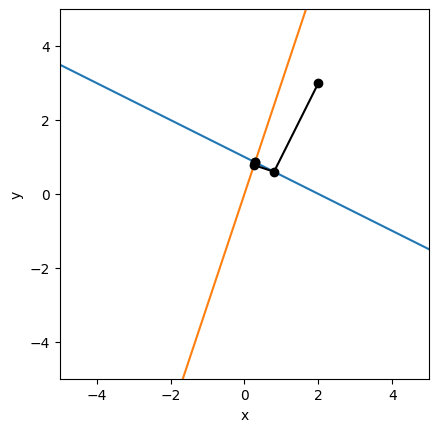

Solution vector: [0.29599999999999993 0.852].
Iteration number: 0
xi =  [4. 3.]
Iteration number: 1
xi =  [2.8 0.6000000000000001]
Iteration number: 2
xi =  [1.0600000000000003 1.18]
Iteration number: 3
xi =  [1.1760000000000004 1.412]
Iteration number: 4
xi =  [1.1412 1.4236]


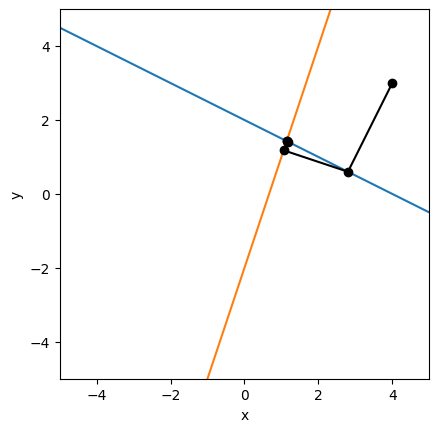

Solution vector: [1.1412 1.4236].

α = 0.5 :
Matrix A:
[[1 2]
 [3 -1]]

Matrix b- lower endpoint:
[2.5 0.5]
Matrix b - upper endpoint:
[3.5 1.5]

First guess:
Matrix x0 - lower endpoint:
[2.5 3.5]
Matrix x0 - upper endpoint:
[3.5 2.5]

Iteration number: 0
xi =  [2.5 3.5]
Iteration number: 1
xi =  [1.1 0.7000000000000002]
Iteration number: 2
xi =  [0.47 0.9100000000000001]
Iteration number: 3
xi =  [0.512 0.9940000000000001]


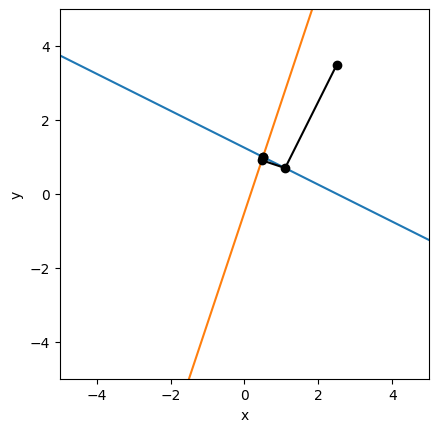

Solution vector: [0.512 0.9940000000000001].
Iteration number: 0
xi =  [3.5 2.5]
Iteration number: 1
xi =  [2.5 0.5]
Iteration number: 2
xi =  [0.8499999999999999 1.05]
Iteration number: 3
xi =  [0.9599999999999999 1.27]
Iteration number: 4
xi =  [0.927 1.281]


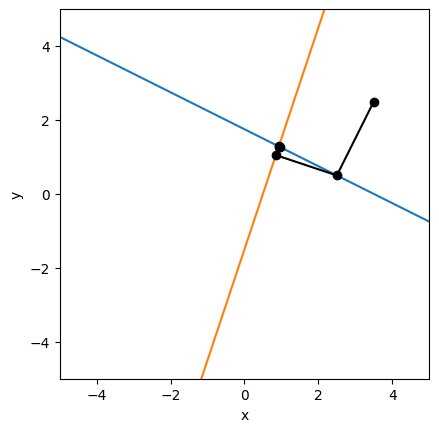

Solution vector: [0.927 1.281].

α = 1 :
Matrix A:
[[1 2]
 [3 -1]]

Matrix b- lower endpoint:
[3. 1.]
Matrix b - upper endpoint:
[3. 1.]

First guess:
Matrix x0 - lower endpoint:
[3. 4.]
Matrix x0 - upper endpoint:
[3. 2.]

Iteration number: 0
xi =  [3. 4.]
Iteration number: 1
xi =  [1.4 0.7999999999999998]
Iteration number: 2
xi =  [0.6800000000000002 1.0399999999999998]
Iteration number: 3
xi =  [0.7280000000000002 1.136]


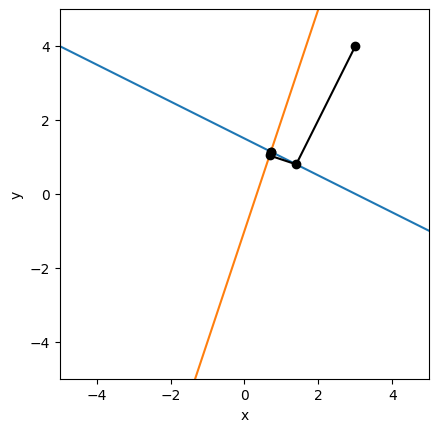

Solution vector: [0.7280000000000002 1.136].
Iteration number: 0
xi =  [3. 2.]
Iteration number: 1
xi =  [2.2 0.3999999999999999]
Iteration number: 2
xi =  [0.6399999999999997 0.92]
Iteration number: 3
xi =  [0.7439999999999998 1.1280000000000001]
Iteration number: 4
xi =  [0.7128 1.1384]


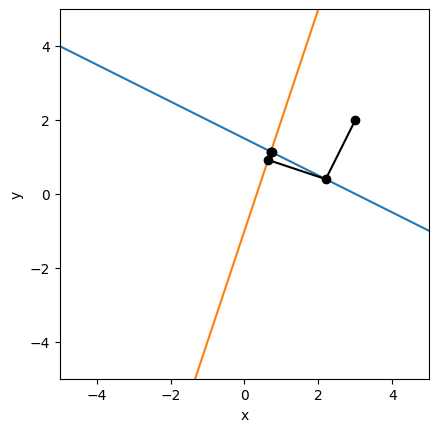

Solution vector: [0.7128 1.1384].



In [46]:
## PIPELINE 2
for alpha in [0, 0.5, 1]:
    print(f"α = {alpha} :")
    pA = np.array([[1, 2],[3, -1]], dtype=object)
    pb = np.array([[np.array([2+alpha,4-alpha]), np.array([0+alpha,2-alpha])]], dtype=object)
    px0 = np.array([[np.array([2+alpha,4-alpha]), np.array([3+alpha,3-alpha])]], dtype=object)

    print("Matrix A:")
    print(pA)

    print()

    pb_ei, pb_es = sys_split(pb,(1,2))
    print("Matrix b- lower endpoint:")
    print(pb_ei)
    print("Matrix b - upper endpoint:")
    print(pb_es)

    print()

    print("First guess:")
    px0_ei, px0_es = sys_split(px0,(1,2))
    print("Matrix x0 - lower endpoint:")
    print(px0_ei)
    print("Matrix x0 - upper endpoint:")
    print(px0_es)

    print()

    px_ei, pXhistory_ei, _ = kaczmerz_method(pA, pb_ei, px0_ei, 1.e-2)
    plot_trajectory(pA, pb_ei, pXhistory_ei)
    print(f'Solution vector: {px_ei}.')

    px_es, pXhistory_es, _ = kaczmerz_method(pA, pb_es, px0_es, 1.e-2)
    plot_trajectory(pA, pb_es, pXhistory_es)
    print(f'Solution vector: {px_es}.')
    print()

α = 0 :
Matrix A - lower endpoint:
[[ 0.  1.]
 [ 2. -2.]]
Matrix A - upper endpoint:
[[2. 3.]
 [4. 0.]]

Matrix b- lower endpoint:
[2. 0.]
Matrix b - upper endpoint:
[4. 2.]

First guess:
Matrix x0 - lower endpoint:
[2. 3.]
Matrix x0 - upper endpoint:
[4. 3.]

Lower endpoint:
Iteration number: 0
xi =  [2. 3.]


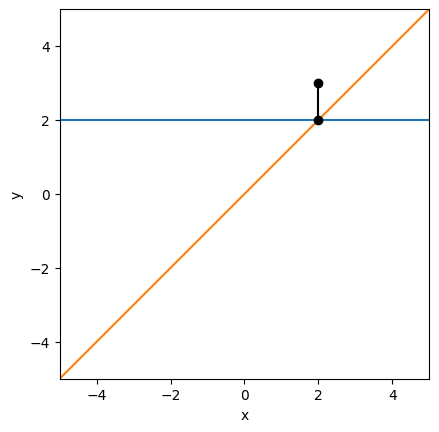

Solution vector: [2. 3.].

Upper endpoint:
Iteration number: 0
xi =  [4. 3.]
Iteration number: 1
xi =  [2. 0.]
Iteration number: 2
xi =  [0.5 0. ]
Iteration number: 3
xi =  [0.96153846 0.69230769]
Iteration number: 4
xi =  [0.5        0.69230769]
Iteration number: 5
xi =  [0.64201183 0.90532544]
Iteration number: 6
xi =  [0.5        0.90532544]
Iteration number: 7
xi =  [0.54369595 0.97086937]
Iteration number: 8
xi =  [0.5        0.97086937]
Iteration number: 9
xi =  [0.51344491 0.99103673]
Iteration number: 10
xi =  [0.5        0.99103673]
Iteration number: 11
xi =  [0.50413689 0.99724207]


C:\Users\vitoria220056\AppData\Local\Temp\ipykernel_4936\3563424995.py:78: RuntimeWarning: divide by zero encountered in divide
  y = np.dot(M,(-A[i,0], b[i])) / A[i,1] #y = (-A[i,0]*m1 + b[i])/A[i,1]


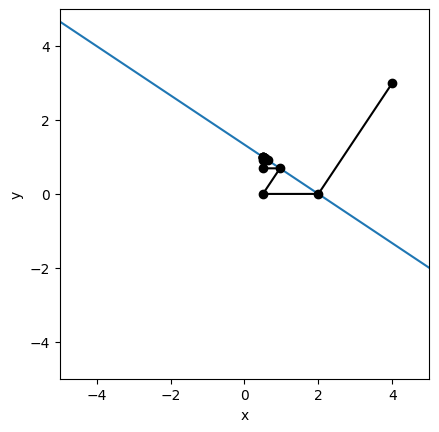

Solution vector: [0.50413689 0.99724207].

α = 0.5 :
Matrix A - lower endpoint:
[[ 0.5  1.5]
 [ 2.5 -1.5]]
Matrix A - upper endpoint:
[[ 1.5  2.5]
 [ 3.5 -0.5]]

Matrix b- lower endpoint:
[2.5 0.5]
Matrix b - upper endpoint:
[3.5 1.5]

First guess:
Matrix x0 - lower endpoint:
[2.5 3.5]
Matrix x0 - upper endpoint:
[3.5 2.5]

Lower endpoint:
Iteration number: 0
xi =  [2.5 3.5]
Iteration number: 1
xi =  [1.7 1.1]
Iteration number: 2
xi =  [1.08235294 1.47058824]
Iteration number: 3
xi =  [1.03294118 1.32235294]
Iteration number: 4
xi =  [1.00387543 1.33979239]


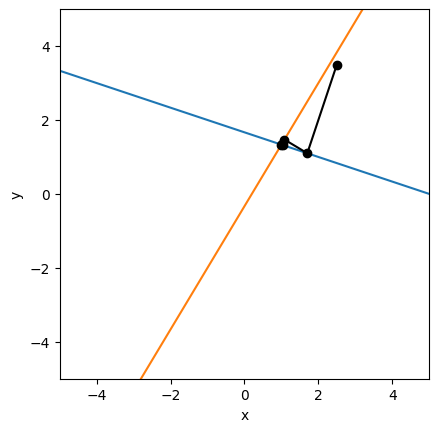

Solution vector: [1.00387543 1.33979239].

Upper endpoint:
Iteration number: 0
xi =  [3.5 2.5]
Iteration number: 1
xi =  [2.08823529 0.14705882]
Iteration number: 2
xi =  [0.48235294 0.37647059]
Iteration number: 3
xi =  [0.80622837 0.91626298]
Iteration number: 4
xi =  [0.56440138 0.95080969]
Iteration number: 5
xi =  [0.61317321 1.03209607]
Iteration number: 6
xi =  [0.57675691 1.0372984 ]
Iteration number: 7
xi =  [0.58410138 1.04953917]


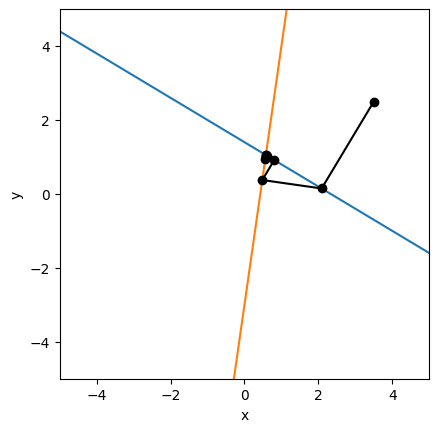

Solution vector: [0.58410138 1.04953917].

α = 1 :
Matrix A - lower endpoint:
[[ 1.  2.]
 [ 3. -1.]]
Matrix A - upper endpoint:
[[ 1.  2.]
 [ 3. -1.]]

Matrix b- lower endpoint:
[3. 1.]
Matrix b - upper endpoint:
[3. 1.]

First guess:
Matrix x0 - lower endpoint:
[3. 4.]
Matrix x0 - upper endpoint:
[3. 2.]

Lower and upper endpoint:
Iteration number: 0
xi =  [3. 4.]
Iteration number: 1
xi =  [1.4 0.8]
Iteration number: 2
xi =  [0.68 1.04]
Iteration number: 3
xi =  [0.728 1.136]


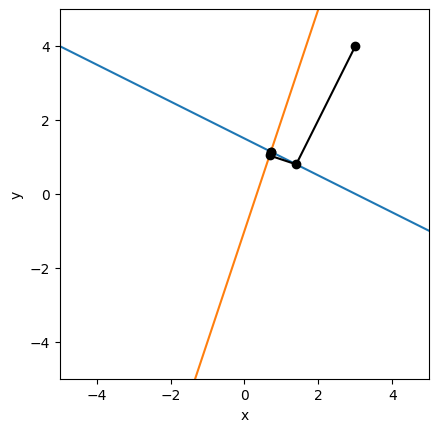

Solution vector: [0.728 1.136].



In [47]:
## PIPELINE 3
for alpha in [0, 0.5, 1]:
    print(f"α = {alpha} :")
    pA = np.array([[np.array([0+alpha,2-alpha]), np.array([1+alpha,3-alpha])],[np.array([2+alpha,4-alpha]), np.array([-2+alpha,0-alpha])]], dtype=object)
    pb = np.array([[np.array([2+alpha,4-alpha]), np.array([0+alpha,2-alpha])]], dtype=object)
    px0 = np.array([[np.array([2+alpha,4-alpha]), np.array([3+alpha,3-alpha])]], dtype=object)

    pA_ei, pA_es = sys_split(pA,(2,2))
    print("Matrix A - lower endpoint:")
    print(pA_ei)
    print("Matrix A - upper endpoint:")
    print(pA_es)

    print()

    pb_ei, pb_es = sys_split(pb,(1,2))
    print("Matrix b- lower endpoint:")
    print(pb_ei)
    print("Matrix b - upper endpoint:")
    print(pb_es)

    print()

    print("First guess:")
    px0_ei, px0_es = sys_split(px0,(1,2))
    print("Matrix x0 - lower endpoint:")
    print(px0_ei)
    print("Matrix x0 - upper endpoint:")
    print(px0_es)

    print()

    if alpha != 1:
        print("Lower endpoint:")
        px_ei, pXhistory_ei, _ = kaczmerz_method(pA_ei, pb_ei, px0_ei, 1.e-2)
        plot_trajectory(pA_ei, pb_ei, pXhistory_ei)
        print(f'Solution vector: {px_ei}.')

        print()

        print("Upper endpoint:")
        px_es, pXhistory_es, _ = kaczmerz_method(pA_es, pb_es, px0_es, 1.e-2)
        plot_trajectory(pA_es, pb_es, pXhistory_es)
        print(f'Solution vector: {px_es}.')
        print()
    
    else:
        print("Lower and upper endpoint:")
        px_ei, pXhistory_ei, _ = kaczmerz_method(pA_ei, pb_ei, px0_ei, 1.e-2)
        plot_trajectory(pA_ei, pb_ei, pXhistory_ei)
        print(f'Solution vector: {px_ei}.')
        print()